### ***Deep Learning : ANN and CNN***
###### **Pr. YOUSSFI, ENSET, UH2C** 

- L'apprentissage profond ( Deep Learning) est un sous-domaine de l’intelligence artificielle qui utilise des réseaux neuronaux artificiels formant de nombreuses couches pour résoudre des tâches complexes. 
- L'apprentissage profond permet des progrès importants et rapides dans les domaines de l'analyse du signal sonore ou visuel, notamment :
   - La reconnaissance faciale, 
   - La reconnaissance vocale,
   - Computer Vision
   - Natural Language Processing (NLP).


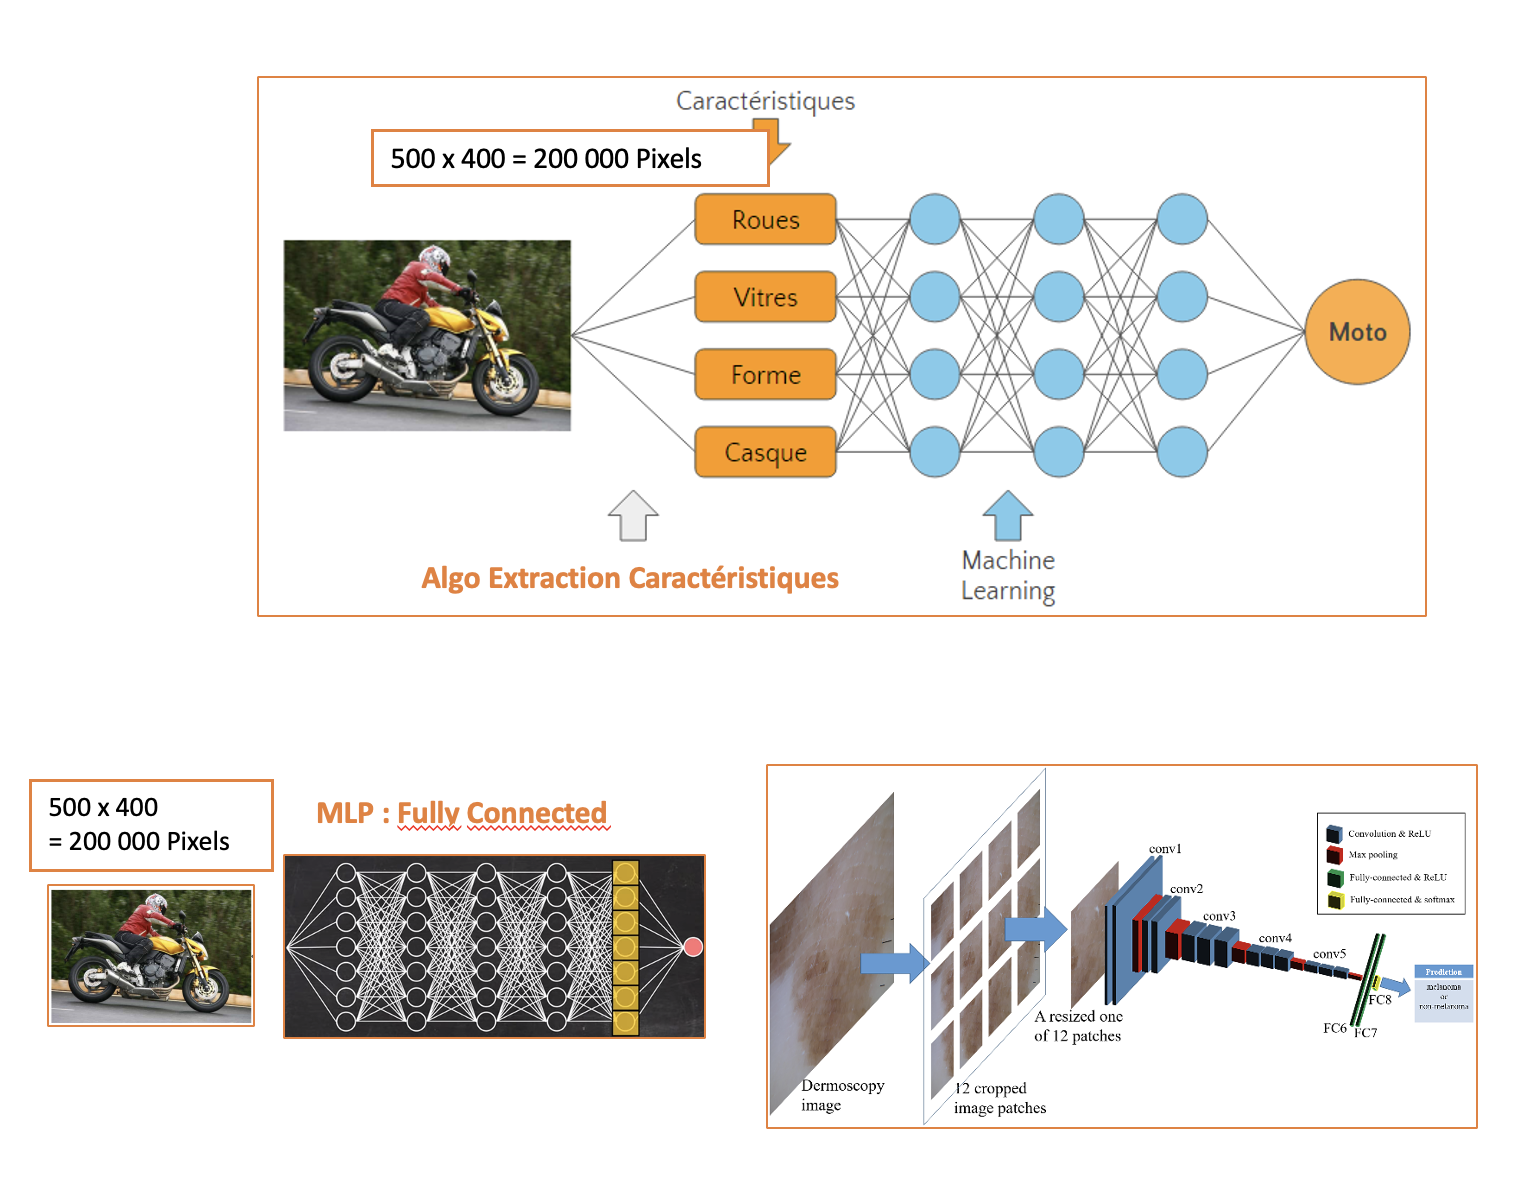

### Réseau de neurones :

- Un neurone artificiel (NA) est une unité de calcul élémentaire (fonction mathématique ) permet de mettre en relations des entrées Xi avec une sortie Y
- Un neurone artificiel est représentation approximative d’un neurone biologique
Additionne ses entrées xi pondérées par des poids wi , 
- compare la somme résultante à une valeur seuil selon un fonction d’activation,répond en émettant un signal si cette somme est supérieure ou égale à ce seuil (modèle ultra-simplifié du fonctionnement d'un neurone biologique).
- Ces neurones sont par ailleurs associés en réseaux dont la topologie des connexions est variable : réseaux proactifs, récurrents, etc. 
- Enfin, l'efficacité de la transmission des signaux d'un neurone à l'autre peut varier : on parle de « poids synaptique », et ces poids peuvent être modulés par des règles d'apprentissage (ce qui mime la plasticité synaptique des réseaux biologiques).
- Un neurone reçoit des signaux venant de d’autres neurones à travers ses dendrites(connexions)
Emit un signal ou non à travers son Axone selon les entrées reçues et les poids synaptiques.



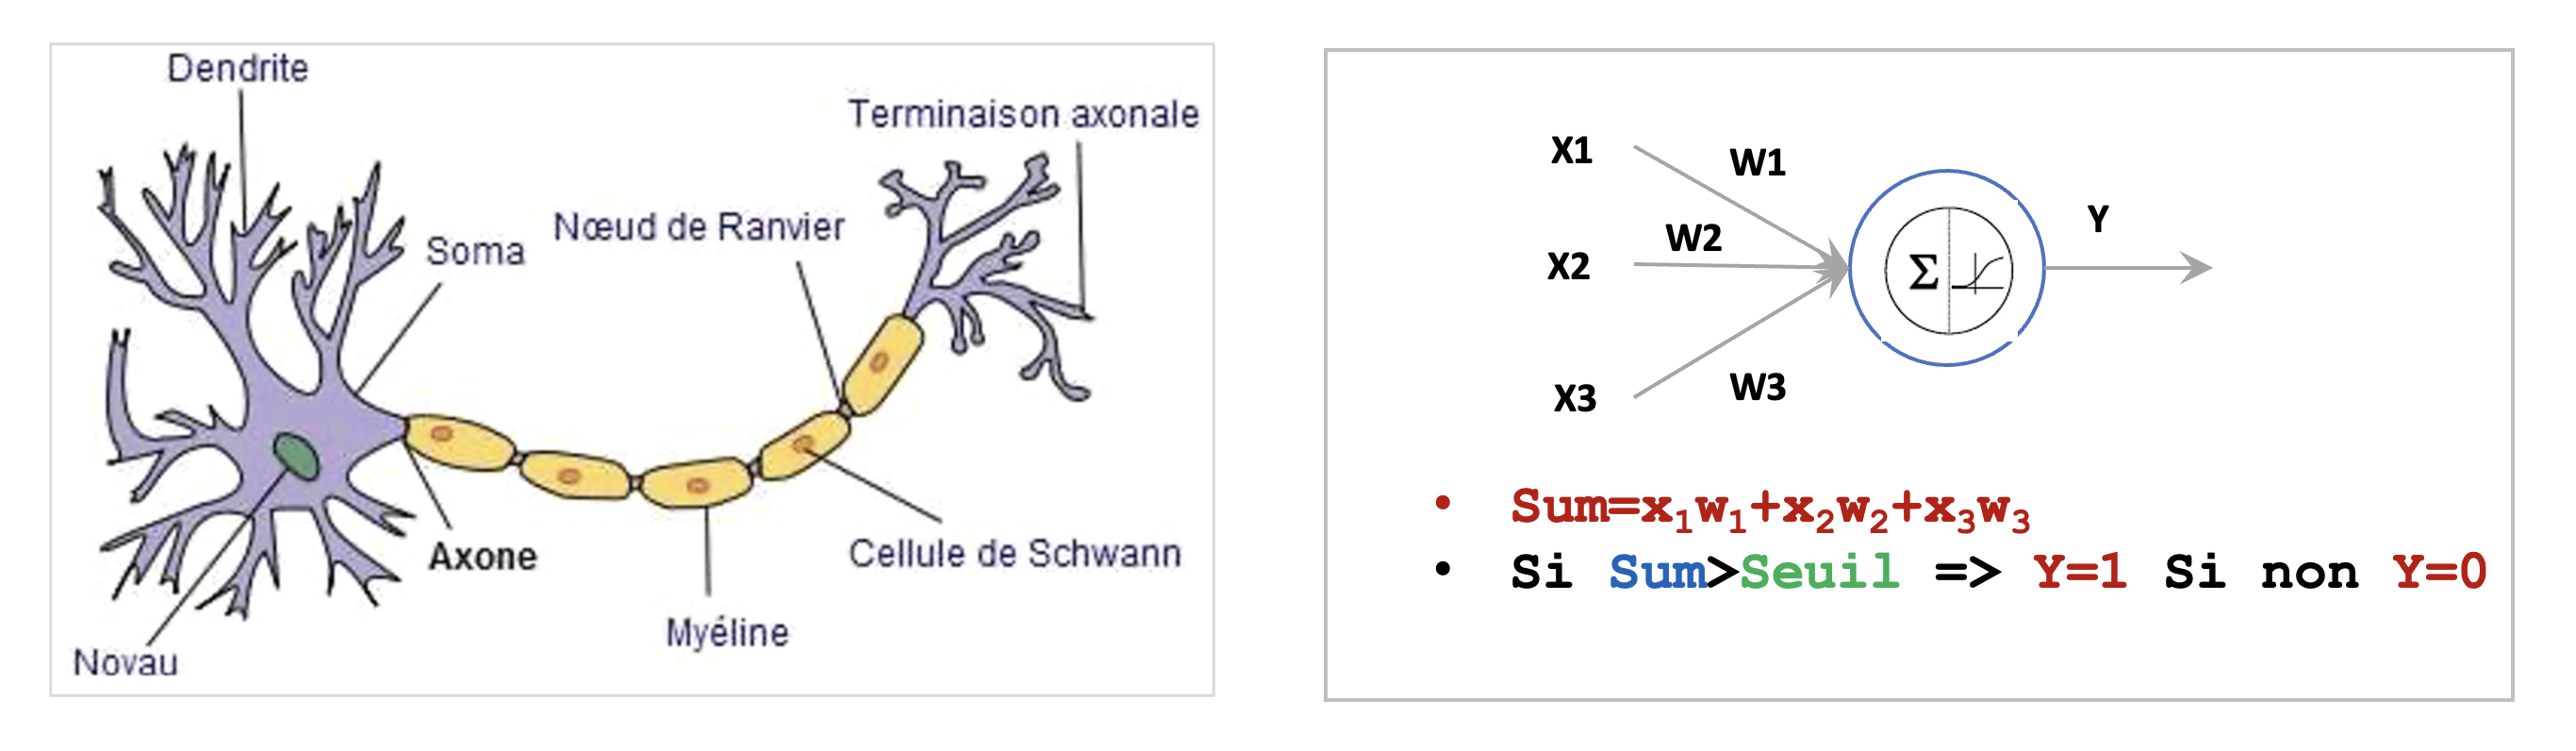

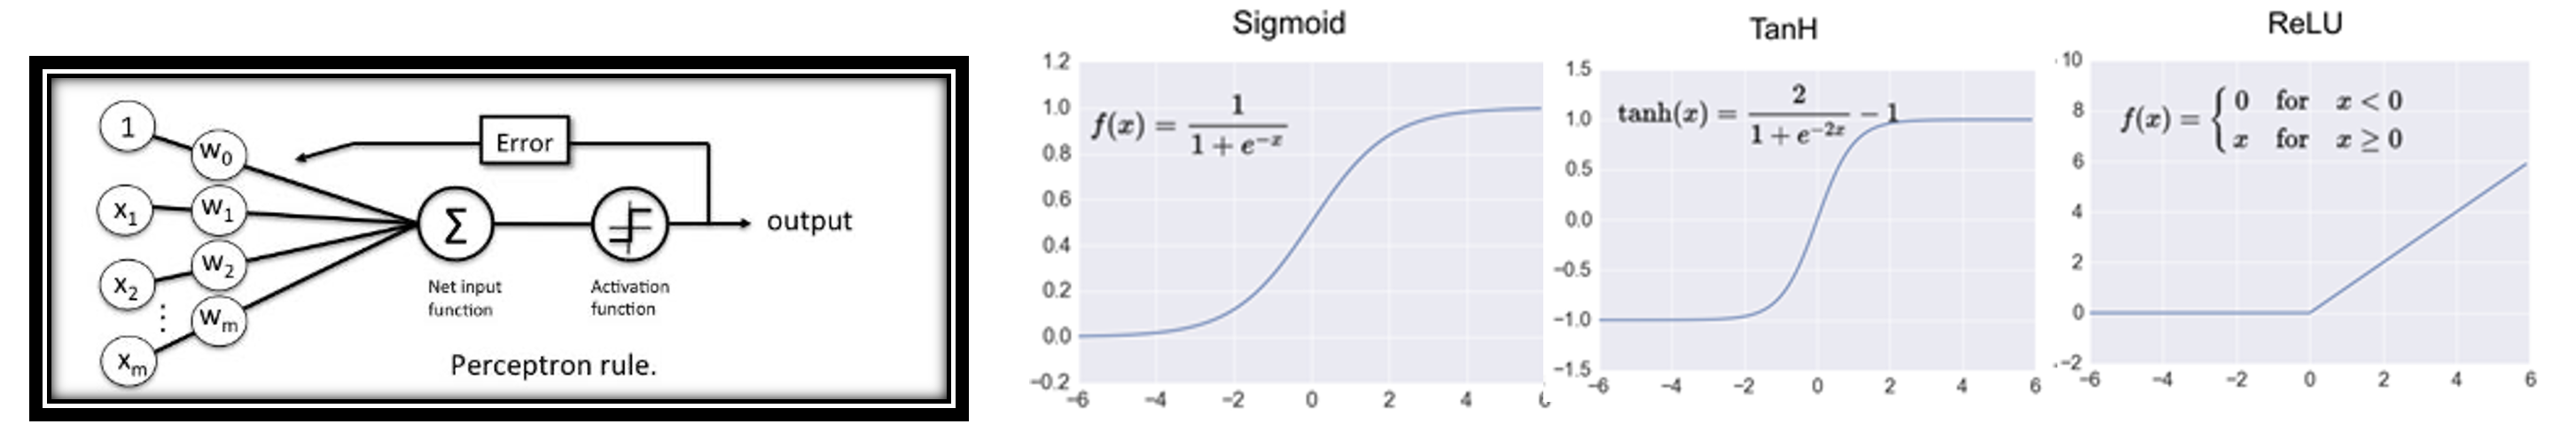

### Perceptron [Frank Rosenblatt ,1957]

- Le Perceptron est un modèle d’apprentissage supervisé, classifieurs binaires (séparant deux classes). 
- Le perceptron reçoie un ensemble d’entrées pondérées par des poids synaptiques wi et produit une sortie binaire en sortie.
- La sortie est produite en :
   - Additionnant les entrées xi pondérées par les poids synaptiques du perceptron wi
𝑺=∑𝒙𝒊𝒘𝒊
   - Ensuite on applique à cette somme une fonction d’activation non linéaire qui produit une sortie binaire. : Exemple Seuillage
      𝒀={
         𝟏 𝒔𝒊 𝑺≥𝜽
        −𝟏 𝒔𝒊 𝑺<𝜽
        )
Dans la phase d’apprentissage, 
   - err= Yp - Yt
   - mise à jour des poids :  𝒘𝒊(t)=𝒘𝒊(t-1)+α err.Xi
   - α : vitesse d’apprentissage (entre 0 et 1)


### Multi Layer Perceptron (MLP)
Un Multi Layer Perceptron (MLP) est un type de réseau de neurones artificiels composé de plusieurs couches de neurones. Voici ses principales caractéristiques :
- **Couches** : Il comprend une couche d'entrée, une ou plusieurs couches cachées, et une couche de sortie.
- **Neurones** : Les neurones dans chaque couche sont connectés à tous les neurones de la couche précédente (connexion "fully connected").
- **Fonction d'activation** : Chaque neurone applique une fonction d'activation (comme ReLU, sigmoïde, ou tanh) pour introduire de la non-linéarité.
- **Entraînement par rétropropagation** : L'apprentissage du MLP se fait par rétropropagation de l'erreur à l'aide d'un algorithme d'optimisation, comme l'Adam ou le SGD.
- **Un MLP** est souvent utilisé pour des tâches de classification ou de régression et est une forme de réseau de neurones feed forward.


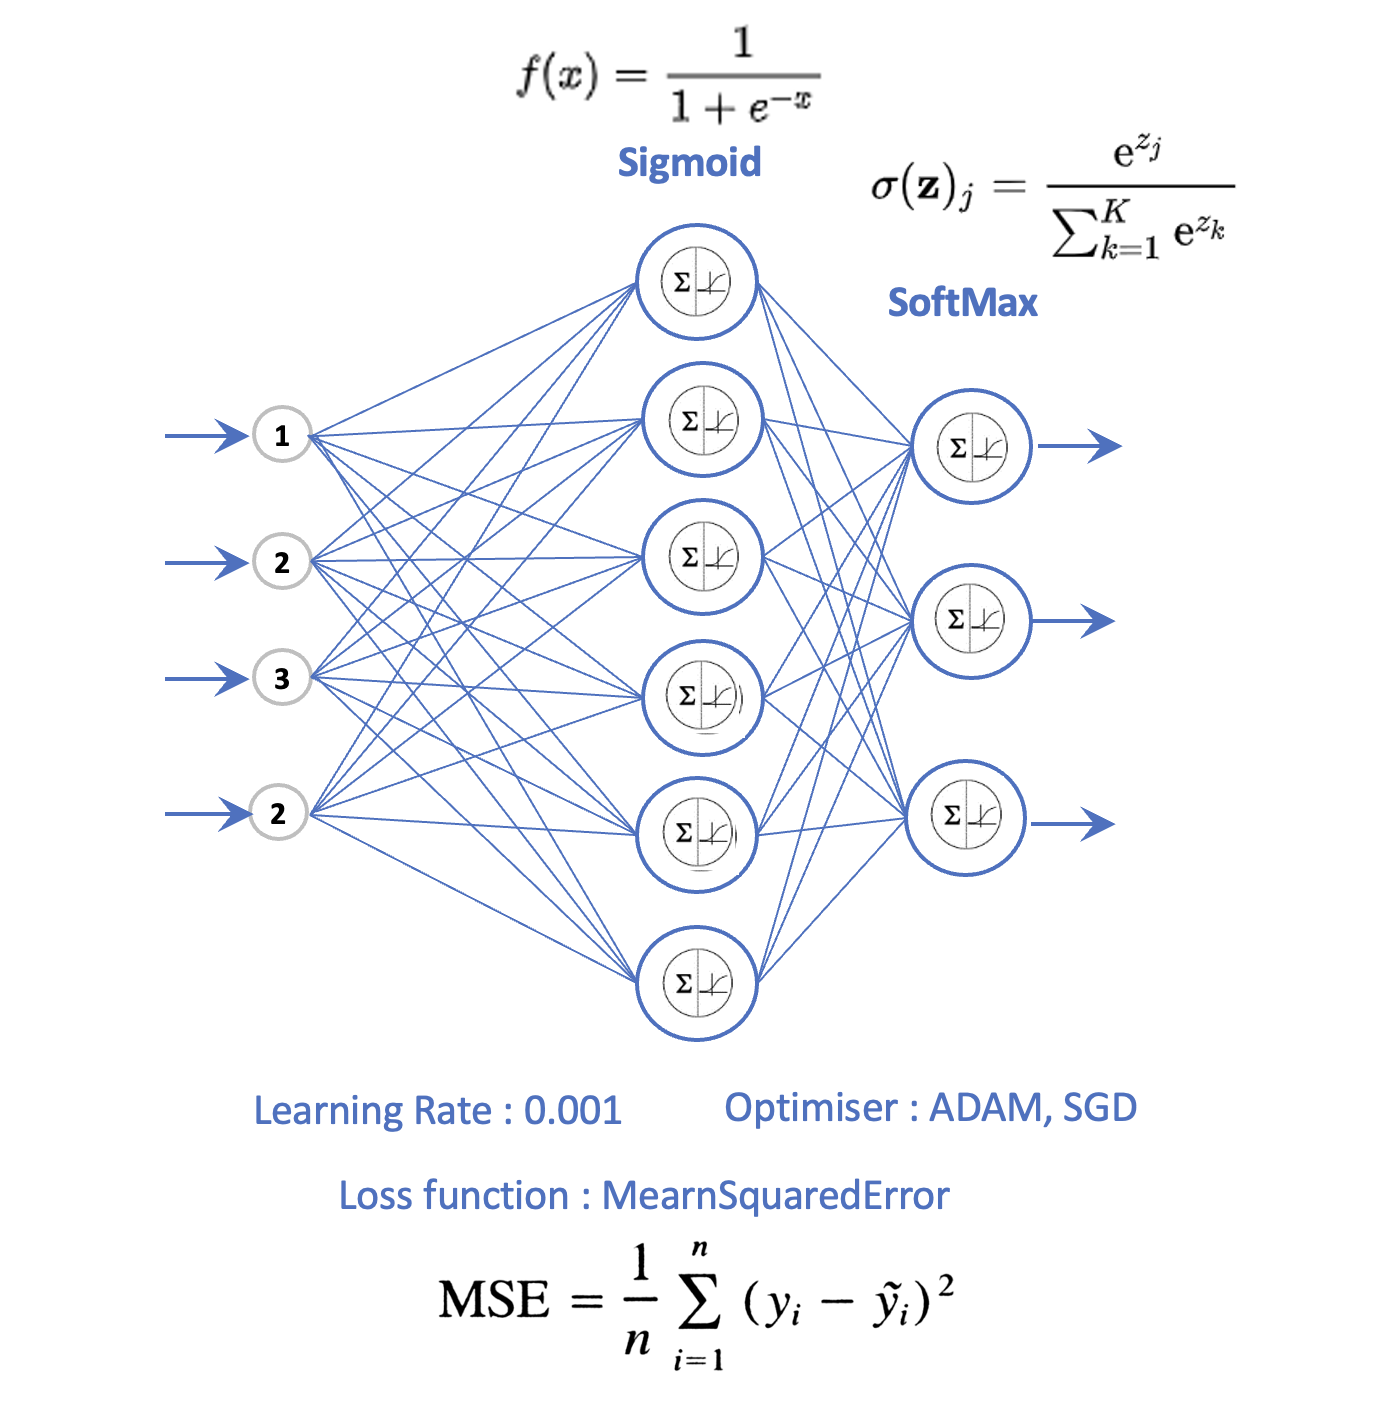

### Modèles de Deep learning

- **ANN  (Artificial Neural Network)**  ou **MLP (Multi Layer Perceptron)**; Réseaux de neurones entièrement connectés
- **CNN (Convolutional Neural network)**; Réseaux de Convolutionnels : Dédiés pour les problèmes de computer vision comme la reconnaissance faciale, la classification des images, la détection des objets dans des images, etc.
- **RNN (Recurrent Neural Network)**, **LSTM (Long Short Time Memory)**, **GRU (Gated Recurrent Unit)** : Dédiés pour la prédiction dans dans des séquences temporelles comme les séries temporelles et pour NLP (Natural Language processing)

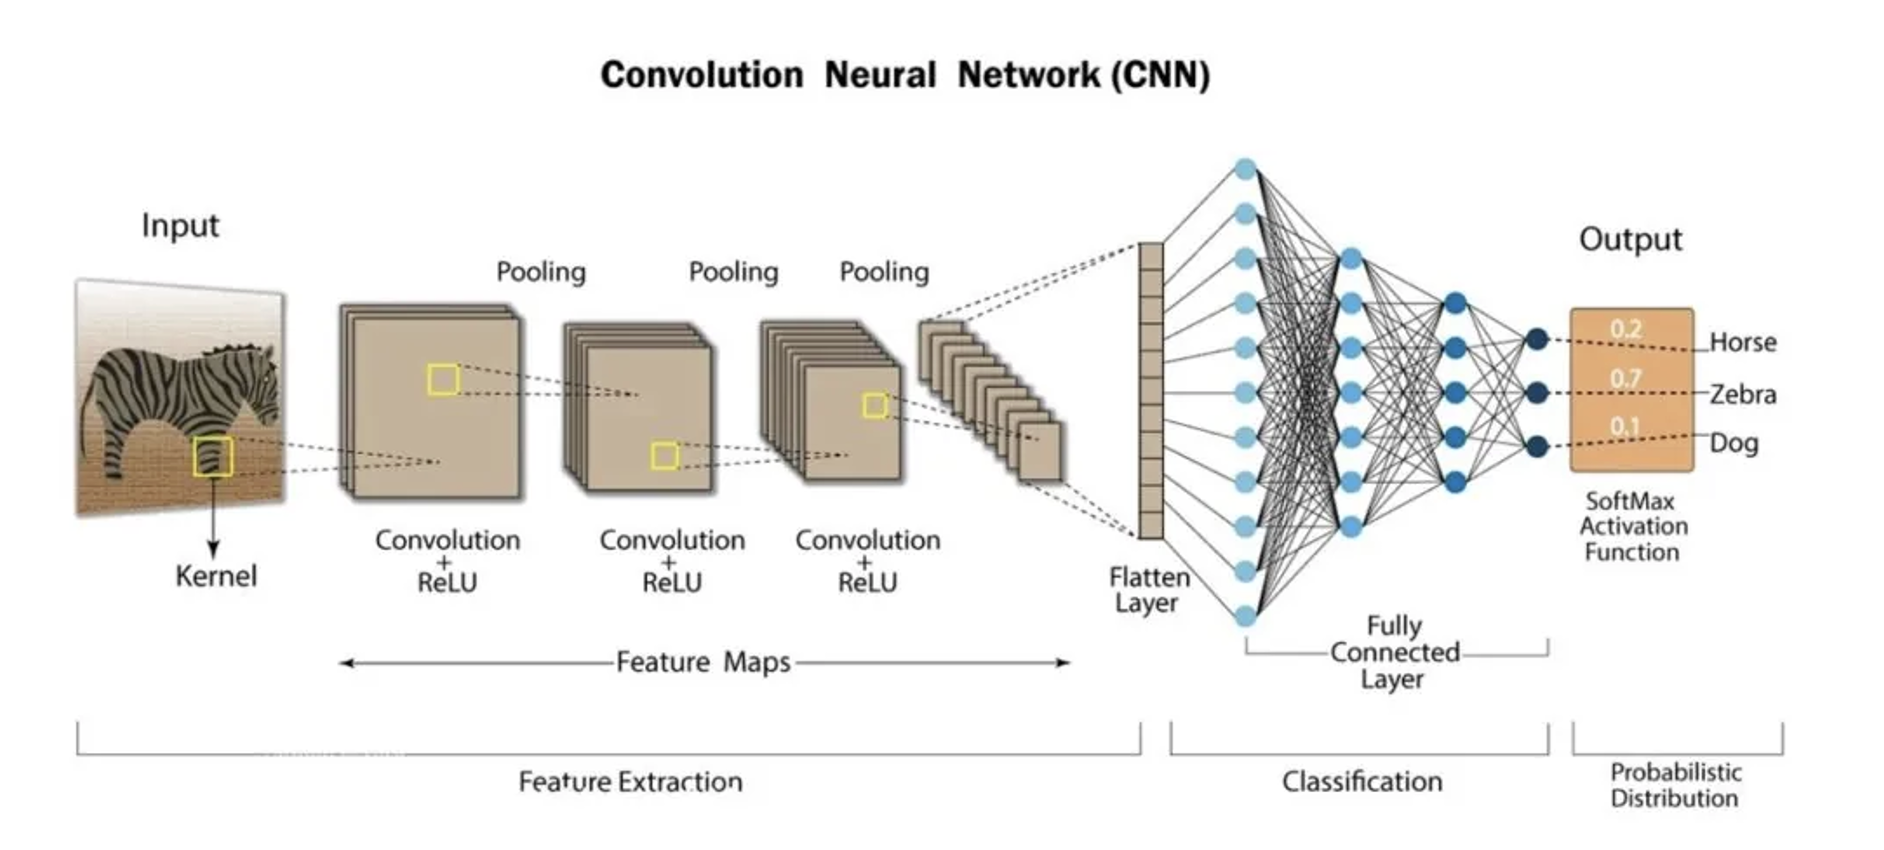

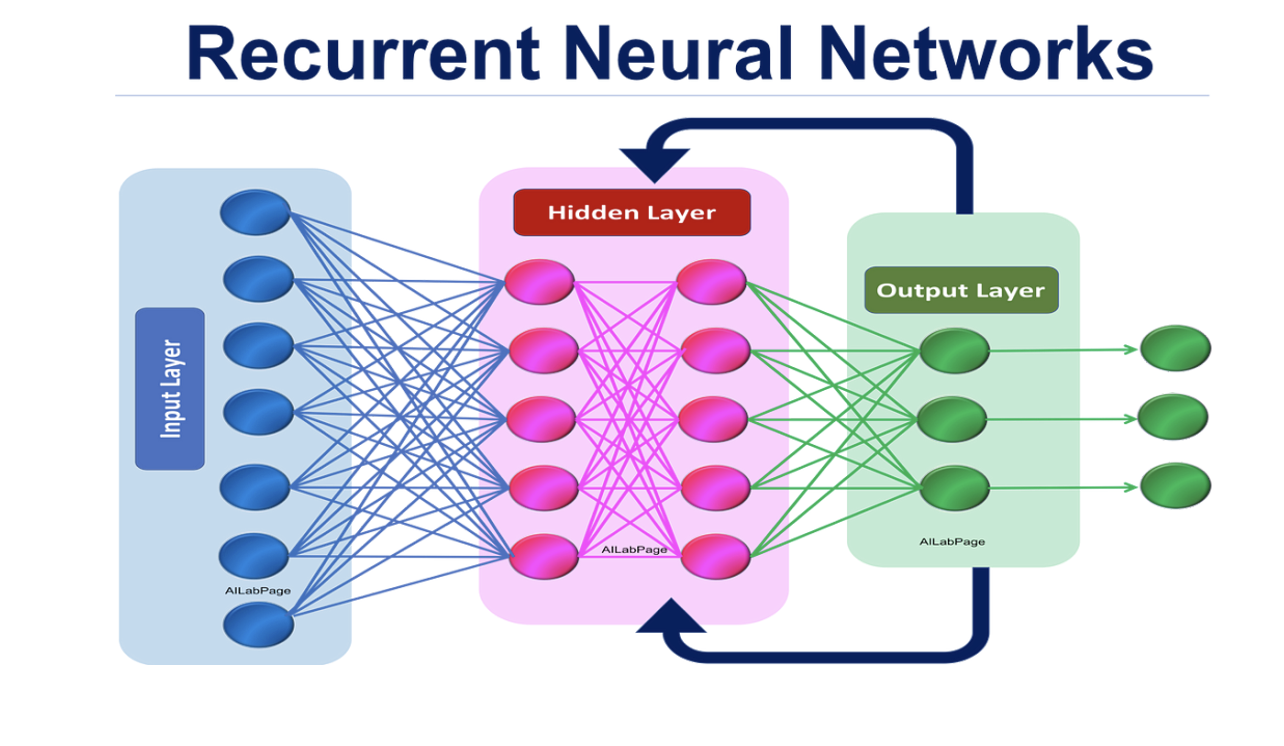 

In [13]:
!pip install -q tensorflow
!pip install -q pandas
!pip install -q seaborn
!pip install -q matplotlib

### **About Dataset**
- MNIST is a subset of a larger set available from NIST (it's copied from http://yann.lecun.com/exdb/mnist/)
- The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples.

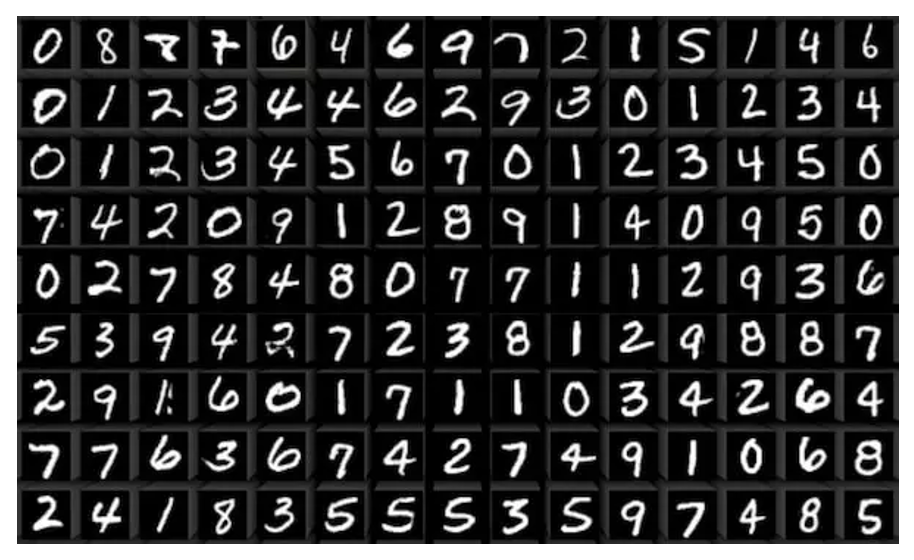

In [166]:
import tensorflow as tf
from tensorflow import keras

In [167]:
(X_train,y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [168]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


<Figure size 640x480 with 0 Axes>

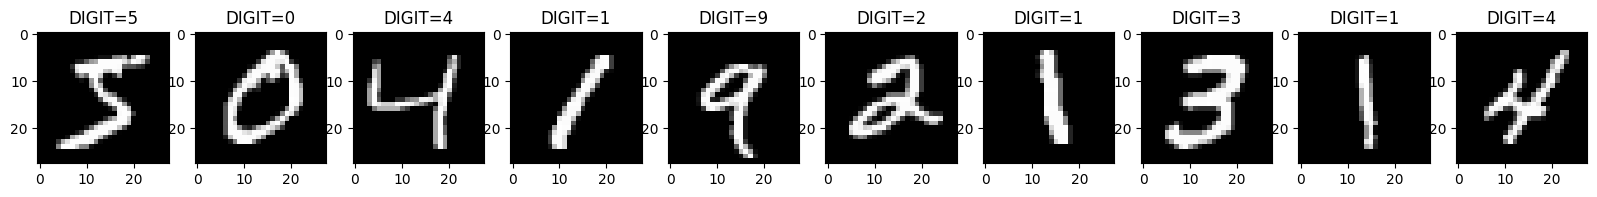

In [306]:
import matplotlib.pyplot as plt
plt.gray()
figure, axis = plt.subplots(ncols=10, figsize=(20,20))
for index in range(10):
   axis[index].imshow(X_train[index])
   axis[index].set_title(f"DIGIT={y_train[index]}")
plt.show()   


In [172]:
gpus = tf.config.experimental.list_logical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [173]:
print(gpus)

[]


## ANN

In [174]:
#X_train_flattened = X_train.reshape(len(X_train), 28*28)
#X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [232]:
ann = keras.Sequential([
    keras.layers.Input((28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])
ann.compile(
    optimizer='adam', 
    loss= 'sparse_categorical_crossentropy', 
    metrics=['accuracy'] 
    )

In [230]:
ann.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_16 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [233]:
history1 = ann.fit(X_train, y_train, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7418 - loss: 0.9331 - val_accuracy: 0.8904 - val_loss: 0.3956
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8874 - loss: 0.3995 - val_accuracy: 0.9004 - val_loss: 0.3447
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8990 - loss: 0.3477 - val_accuracy: 0.9051 - val_loss: 0.3389
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9060 - loss: 0.3228 - val_accuracy: 0.9112 - val_loss: 0.3061
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9046 - loss: 0.3248 - val_accuracy: 0.9057 - val_loss: 0.3128
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 982us/step - accuracy: 0.9087 - loss: 0.3047 - val_accuracy: 0.9159 - val_loss: 0.2865
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9157 - loss: 0.2846 - val_accuracy: 0.9186 - val_loss: 0.2726
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9165 - loss: 0.2709 

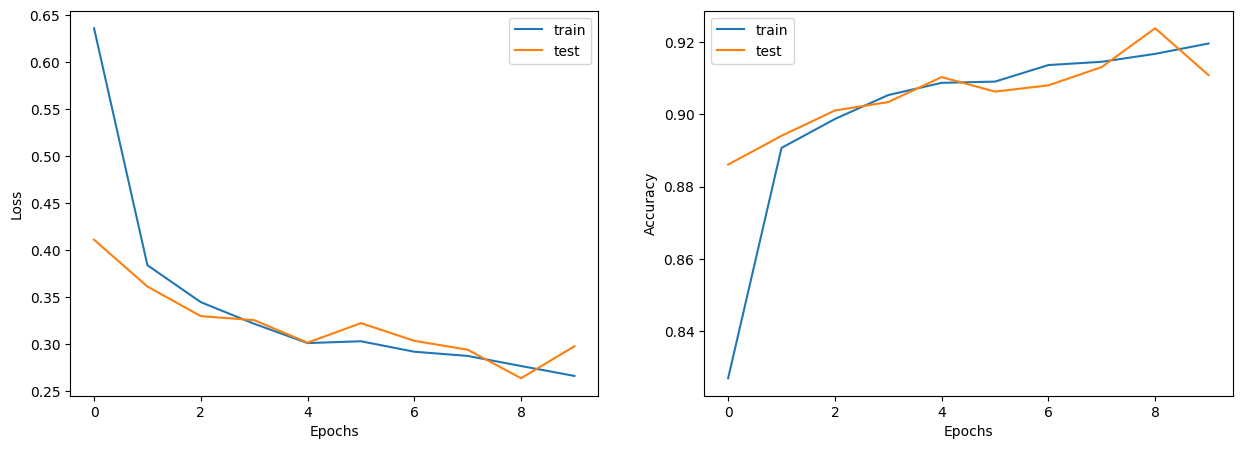

In [208]:
figure, axis = plt.subplots(ncols=2, figsize=(15,5))
axis[0].plot(history1.history['loss'])
axis[0].plot(history1.history['val_loss'])
axis[0].set_xlabel('Epochs')
axis[0].set_ylabel('Loss')
axis[0].legend(['train','test'])
axis[1].plot(history1.history['accuracy'])
axis[1].plot(history1.history['val_accuracy'])
axis[1].set_xlabel('Epochs')
axis[1].set_ylabel('Accuracy')
axis[1].legend(['train','test'])
plt.show()

In [255]:
train_evaluation =ann.evaluate(X_train, y_train)
test_evaluation= ann.evaluate(X_test, y_test)
print("-"*80)
print(f"Train Loss = {train_evaluation[0]}, Train Accuracy = {train_evaluation[1]}")
print("-"*80)
print(f"Test Loss = {test_evaluation[0]}, Test Accuracy = {test_evaluation[1]}")
print("-"*80)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.9197 - loss: 0.2700
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - accuracy: 0.9099 - loss: 0.3057
--------------------------------------------------------------------------------
Train Loss = 0.27229562401771545, Train Accuracy = 0.9186999797821045
--------------------------------------------------------------------------------
Test Loss = 0.27174338698387146, Test Accuracy = 0.9207000136375427
--------------------------------------------------------------------------------


In [244]:
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns

In [240]:
pred = ann.predict(X_test)
predictions = np.argmax(pred, axis=1)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step


array([7, 2, 1, ..., 4, 5, 6])

In [242]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       980
           1       0.97      0.99      0.98      1135
           2       0.95      0.90      0.92      1032
           3       0.89      0.91      0.90      1010
           4       0.90      0.93      0.91       982
           5       0.90      0.90      0.90       892
           6       0.94      0.92      0.93       958
           7       0.93      0.91      0.92      1028
           8       0.88      0.90      0.89       974
           9       0.90      0.88      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Text(50.722222222222214, 0.5, 'Actual')

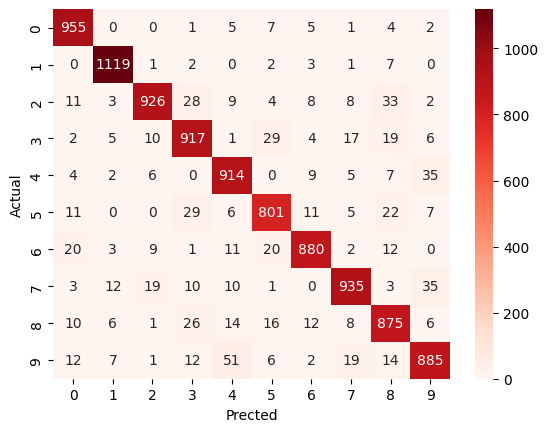

In [249]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Prected')
plt.ylabel('Actual')

### Scale Data

In [257]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0
history2 = ann.fit(X_train_scaled, y_train, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9349 - loss: 0.2308 - val_accuracy: 0.9445 - val_loss: 0.1932
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9477 - loss: 0.1748 - val_accuracy: 0.9516 - val_loss: 0.1714
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9569 - loss: 0.1492 - val_accuracy: 0.9558 - val_loss: 0.1536
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9628 - loss: 0.1283 - val_accuracy: 0.9598 - val_loss: 0.1400
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9698 - loss: 0.1078 - val_accuracy: 0.9625 - val_loss: 0.1291
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9726 - loss: 0.0921 - val_accuracy: 0.9654 - val_loss: 0.1197
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9790 - loss: 0.0756 - val_accuracy: 0.9656 - val_loss: 0.1131
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9829 - loss: 0.0639 - 

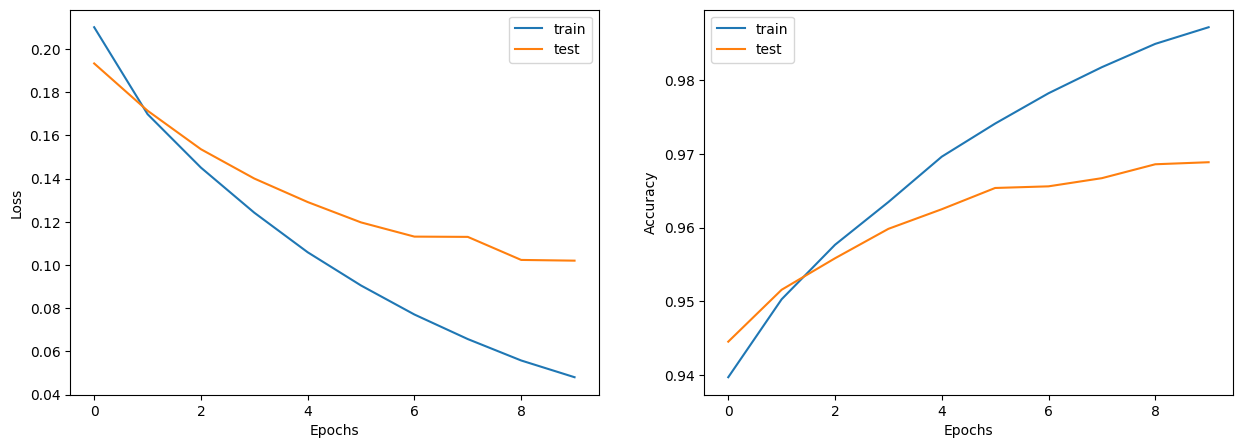

In [258]:
figure, axis = plt.subplots(ncols=2, figsize=(15,5))
axis[0].plot(history2.history['loss'])
axis[0].plot(history2.history['val_loss'])
axis[0].set_xlabel('Epochs')
axis[0].set_ylabel('Loss')
axis[0].legend(['train','test'])
axis[1].plot(history2.history['accuracy'])
axis[1].plot(history2.history['val_accuracy'])
axis[1].set_xlabel('Epochs')
axis[1].set_ylabel('Accuracy')
axis[1].legend(['train','test'])
plt.show()

In [259]:
train_evaluation =ann.evaluate(X_train, y_train)
test_evaluation= ann.evaluate(X_test, y_test)
print("-"*80)
print(f"Train Loss = {train_evaluation[0]}, Train Accuracy = {train_evaluation[1]}")
print("-"*80)
print(f"Test Loss = {test_evaluation[0]}, Test Accuracy = {test_evaluation[1]}")
print("-"*80)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 455us/step - accuracy: 0.9832 - loss: 0.0544
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.9609 - loss: 0.1376
--------------------------------------------------------------------------------
Train Loss = 0.07728223502635956, Train Accuracy = 0.9763666391372681
--------------------------------------------------------------------------------
Test Loss = 0.12216612696647644, Test Accuracy = 0.9643999934196472
--------------------------------------------------------------------------------


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.98      0.96      1032
           3       0.97      0.96      0.97      1010
           4       0.97      0.93      0.95       982
           5       0.98      0.94      0.96       892
           6       0.98      0.96      0.97       958
           7       0.96      0.97      0.96      1028
           8       0.96      0.95      0.96       974
           9       0.92      0.97      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



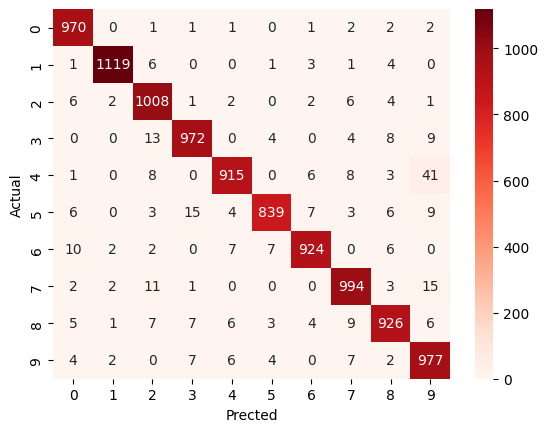

In [261]:
train_evaluation =ann.evaluate(X_train, y_train)
test_evaluation= ann.evaluate(X_test, y_test)
print("-"*80)
print(f"Train Loss = {train_evaluation[0]}, Train Accuracy = {train_evaluation[1]}")
print("-"*80)
print(f"Test Loss = {test_evaluation[0]}, Test Accuracy = {test_evaluation[1]}")
print("-"*80)

pred = ann.predict(X_test)
predictions = np.argmax(pred, axis=1)
print(classification_report(y_test, predictions))

cm = tf.math.confusion_matrix(labels=y_test, predictions=predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Prected')
plt.ylabel('Actual')
plt.show()

### CNN

In [262]:
cnn = keras.Sequential([
    keras.layers.Input((28,28,1)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
cnn.compile(
    optimizer='adam', 
    loss= 'sparse_categorical_crossentropy', 
    metrics=['accuracy'] 
    )

In [263]:
cnn.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 100)            │       160,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,926 (702.84 KB)

 Trainable params: 179,926 (702.84 KB)

 Non-trainable params: 0 (0.00 B)

In [264]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0
history3 = cnn.fit(X_train_scaled, y_train, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8829 - loss: 0.3708 - val_accuracy: 0.9792 - val_loss: 0.0675
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9836 - loss: 0.0511 - val_accuracy: 0.9849 - val_loss: 0.0514
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9895 - loss: 0.0322 - val_accuracy: 0.9861 - val_loss: 0.0500
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9926 - loss: 0.0232 - val_accuracy: 0.9857 - val_loss: 0.0485
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9938 - loss: 0.0193 - val_accuracy: 0.9860 - val_loss: 0.0510
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9960 - loss: 0.0114 - val_accuracy: 0.9878 - val_loss: 0.0440
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9961 - loss: 0.0115 - val_accuracy: 0.9897 - val_loss: 0.0408
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9977 - loss: 0.0070 -

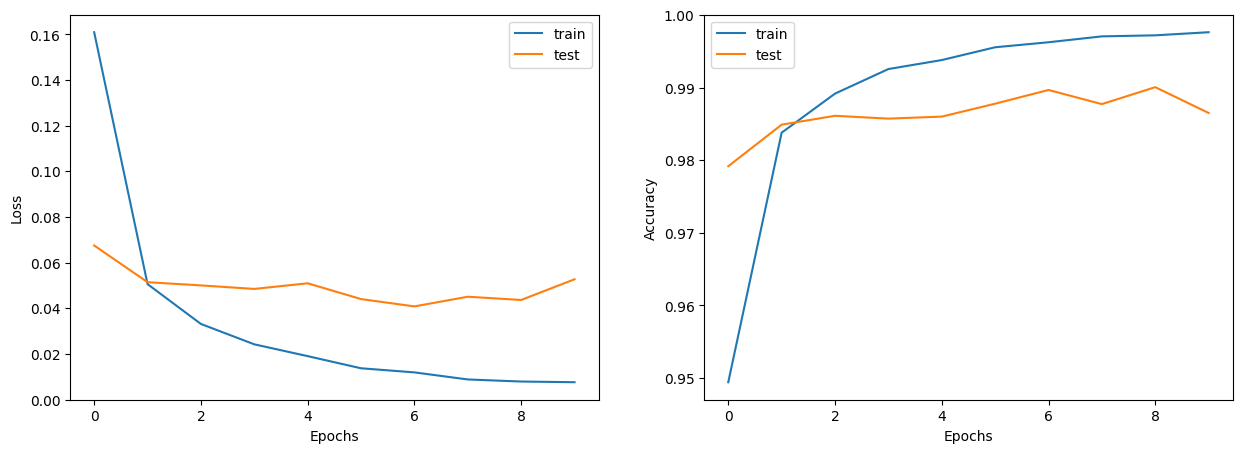

In [265]:
figure, axis = plt.subplots(ncols=2, figsize=(15,5))
axis[0].plot(history3.history['loss'])
axis[0].plot(history3.history['val_loss'])
axis[0].set_xlabel('Epochs')
axis[0].set_ylabel('Loss')
axis[0].legend(['train','test'])
axis[1].plot(history3.history['accuracy'])
axis[1].plot(history3.history['val_accuracy'])
axis[1].set_xlabel('Epochs')
axis[1].set_ylabel('Accuracy')
axis[1].legend(['train','test'])
plt.show()

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9954 - loss: 2.8304
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9823 - loss: 17.6253
--------------------------------------------------------------------------------
Train Loss = 5.735527992248535, Train Accuracy = 0.9932833313941956
--------------------------------------------------------------------------------
Test Loss = 12.59516716003418, Test Accuracy = 0.9868000149726868
--------------------------------------------------------------------------------
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.99       

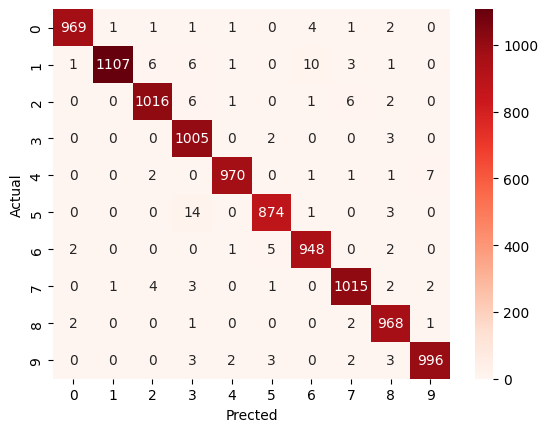

In [266]:
train_evaluation =cnn.evaluate(X_train, y_train)
test_evaluation= cnn.evaluate(X_test, y_test)
print("-"*80)
print(f"Train Loss = {train_evaluation[0]}, Train Accuracy = {train_evaluation[1]}")
print("-"*80)
print(f"Test Loss = {test_evaluation[0]}, Test Accuracy = {test_evaluation[1]}")
print("-"*80)

pred = cnn.predict(X_test)
predictions = np.argmax(pred, axis=1)
print(classification_report(y_test, predictions))

cm = tf.math.confusion_matrix(labels=y_test, predictions=predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Prected')
plt.ylabel('Actual')
plt.show()

### **Prediction**

In [267]:
!pip install opencv-python

  Using cached opencv_python-4.11.0.86-cp37-abi3-macosx_13_0_arm64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-macosx_13_0_arm64.whl (37.3 MB)


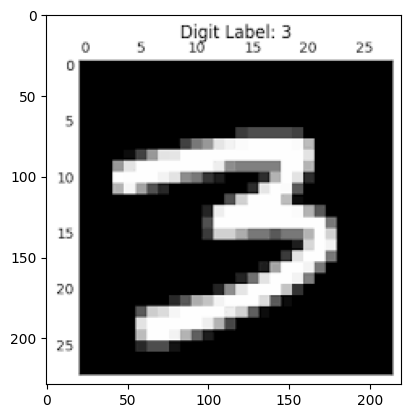

In [ ]:
import cv2
img = cv2.imread('3.png')
plt.imshow(img)
plt.show()

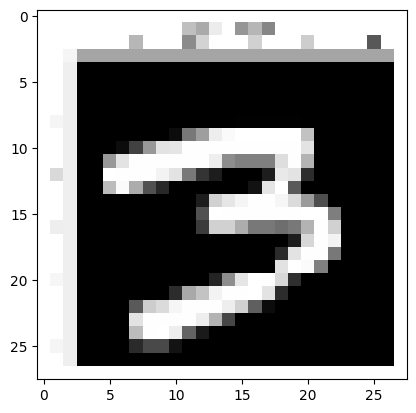

In [285]:
img_resized = tf.image.resize(img,size=(28,28))
gray_image = tf.image.rgb_to_grayscale(img_resized)
plt.imshow(gray_image)

In [286]:
gray_image.shape

TensorShape([28, 28, 1])

In [290]:
predicted = cnn.predict(np.expand_dims(gray_image/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [292]:
print(np.argmax(predicted))

3


### **Saving the trained model**

In [294]:
import os

In [299]:
ann.save(os.path.join('models','ann_image_classifier_v1.h5'))
cnn.save(os.path.join('models','cnn_image_classifier_V1.h5'))

### **Loading the trained model**

In [301]:
from tensorflow.keras.models import load_model
new_model = load_model('models/cnn_image_classifier_V1.h5')

In [304]:
pred = new_model.predict(np.expand_dims(gray_image/255,0))
print(np.argmax(pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3
